In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets
from sklearn.svm import SVC


We will be using the markdown boxes to help describe what's happening in some of these code blocks.  Note all markdown boxes will talk about the code block directly below it.
For instance, in this case, the block below loads the very common iris flower data set.  It then chooses to look at only the first two features. With Y having the results to train with.

In [12]:
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target 

The below attempts to make the visual readable and seperated by the indicated category.  In other words, this helps to graph the boundaries betwen the points.

In [3]:
def decision_boundary(X,y,model,res,test_idx=None):
    markers=['s','o','x']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap=ListedColormap(colors[:len(np.unique(y))])
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)
    plt.pcolormesh(xx,yy,zz,cmap=colormap)

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


Take the dataset and split the data by test and training data.  Standardize the data.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_new=scaler.transform(X_train)
X_test_new=scaler.transform(X_test)

The first of several plots, this first one focuses on changign up the C value.  vstack and hstack turn individual arrays into a matrix style strucutre.
Documentation for those functions are here: https://numpy.org/doc/stable/reference/generated/numpy.vstack.html 

The below is also called "hard SVM" which is not considered overfitting but just a stricter return on the values.

C:\Users\Robert\AppData\Local\Temp\ipykernel_21380\4245080456.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


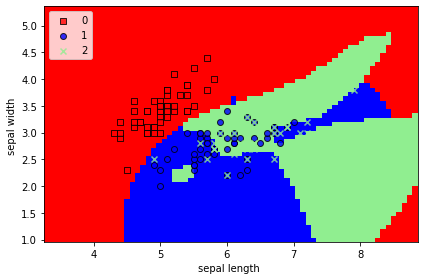

In [5]:
model=SVC(C=10**10)
model.fit(X_train,y_train) # Hard SVM
decision_boundary(np.vstack((X_train,X_test)),np.hstack((y_train,y_test)),model,0.08,test_idx=None)
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Lower C value or "Soft SVM" that returns a more generic returned dataset that is more willing to have values in the wrong areas.

C:\Users\Robert\AppData\Local\Temp\ipykernel_21380\4245080456.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


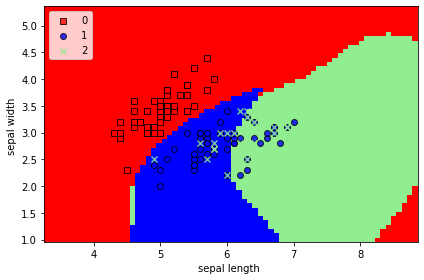

In [6]:
model=SVC(C=100)  # Soft SVM
model.fit(X_train,y_train)
decision_boundary(np.vstack((X_train,X_test)),np.hstack((y_train,y_test)),model,0.08,test_idx=None)
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Gamma helps to determine how strong of a fit we use, note that there is a kernel being used in this one as well.

C:\Users\Robert\AppData\Local\Temp\ipykernel_21380\4245080456.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


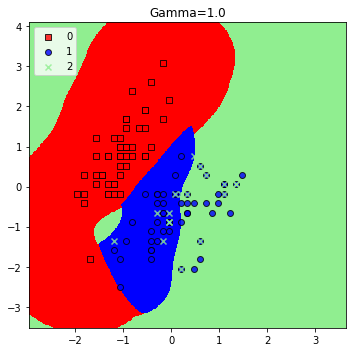

In [7]:
plt.figure(figsize=(5,5))
model = SVC(kernel='rbf', random_state=1, gamma=1.0, C=10.0)
model.fit(X_train_new,y_train)
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
plt.title('Gamma=1.0')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

As seen below, a high gamma leads to overfitting and is generally considered "unoptimal".

C:\Users\Robert\AppData\Local\Temp\ipykernel_21380\4245080456.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


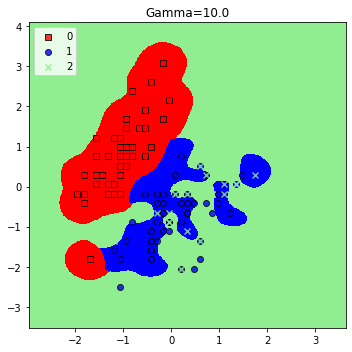

In [8]:
plt.figure(figsize=(5,5))
model = SVC(kernel='rbf', random_state=1, gamma=10.0, C=10.0)
model.fit(X_train_new,y_train)
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
plt.title('Gamma=10.0')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

A case of extreme overfitting.

C:\Users\Robert\AppData\Local\Temp\ipykernel_21380\4245080456.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


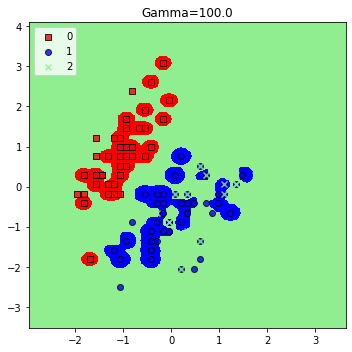

In [9]:
plt.figure(figsize=(5,5))
model = SVC(kernel='rbf', random_state=1, gamma=100.0, C=10.0)
model.fit(X_train_new,y_train)
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
plt.title('Gamma=100.0')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


The below is using the same data and doing the same things above, but this time is focusing on showing off a "hard" and "soft" SVM for the linear and default kernals of SVM.
Note that kernals in SVM are the baseline function that the model tries to fit the hyperplane to.

C:\Users\Robert\AppData\Local\Temp\ipykernel_21380\2083775390.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[Y==cl,0],X[Y==cl,1],c=colors[idx],cmap=colormap, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)
C:\Users\Robert\AppData\Local\Temp\ipykernel_21380\2083775390.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[Y==cl,0],X[Y==cl,1],c=colors[idx],cmap=colormap, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)
C:\Users\Robert\AppData\Local\Temp\ipykernel_21380\2083775390.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in 

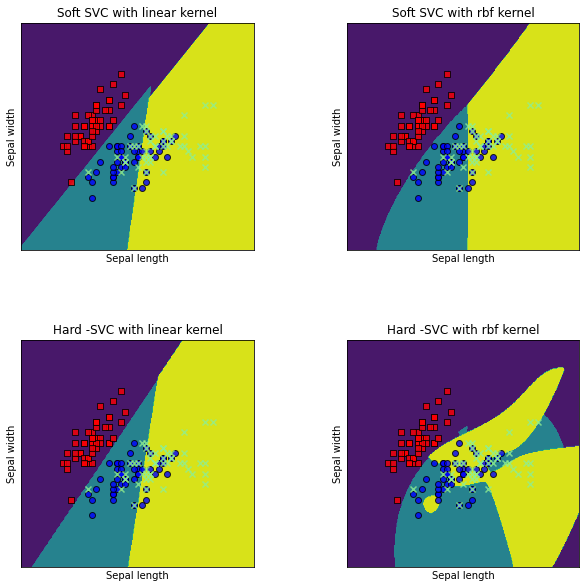

In [10]:
def create_mesh(x,y,res=0.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    return xx,yy
def create_contours(ax,clf,xx,yy,**parameters):
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    zz=z.reshape(xx.shape)
    out = ax.contourf(xx, yy, zz)
    return out
## Creating the sub-plots
models = (svm.SVC(kernel='linear', C=1.0),
          svm.SVC(C=1.0),SVC(C=10**10,kernel='linear'),SVC(C=10**10,kernel='rbf'))
models = (clf.fit(X_train, y_train) for clf in models)
# title for the plots
titles = ('Soft SVC with linear kernel',
          'Soft SVC with rbf kernel', 'Hard -SVC with linear kernel','Hard -SVC with rbf kernel')
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
xx,yy=create_mesh(X[:,0], X[:,1])
for clf, title, ax in zip(models, titles, sub.flatten()):
    markers=['s','o','x']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap=ListedColormap(colors[:len(np.unique(Y))])
    create_contours(ax, clf, xx, yy,cmap=colormap)
    for idx,cl in enumerate(np.unique(Y)):
        ax.scatter(X[Y==cl,0],X[Y==cl,1],c=colors[idx],cmap=colormap, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
plt.show()

Code found on https://www.analyticsvidhya.com/blog/2021/04/insight-into-svm-support-vector-machine-along-with-code/
Code uses common flower petal dataset.  https://www.kaggle.com/datasets/arshid/iris-flower-dataset  For if you would like to look at the dataset. 
 It is built into one of the imported libraries.